<a href="https://colab.research.google.com/github/SanyaMar/-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import os
import csv
import random
from typing import Any, Tuple, List

import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def getting_absolute_path(images_class: str, path_dataset: str) -> List[str]:
    '''
    Данная функция возвращает список list абсолютных путей изображений
    Parameters: class_name : str, second_dataset: str
    Returns: list
    '''
    absolute_path = os.path.abspath(path_dataset)
    class_path = os.path.join(absolute_path, images_class)
    image_names = os.listdir(class_path)
    image_absolute_path = [os.path.join(class_path, name) for name in image_names]

    return image_absolute_path

def getting_absolute_path(images_class: str, path_dataset: str) -> List[str]:
    '''
    Данная функция возвращает список list абсолютных путей изображений
    Parameters: class_name : str, second_dataset: str
    Returns: list
    '''
    absolute_path = os.path.abspath(path_dataset)
    class_path = os.path.join(absolute_path, images_class)
    image_names = os.listdir(class_path)
    image_absolute_path = [os.path.join(class_path, name) for name in image_names]

    return image_absolute_path

def getting_relative_path(images_class: str,  path_dataset: str) -> List[str]:
    '''
    Данная функция возвращает список list относительных путей изображений(относительно dataset)
    Parameters: class_name : str, path_dataset: str
    Returns: list
    '''
    relative_path = os.path.relpath(path_dataset)
    class_path = os.path.join(relative_path, images_class)
    image_names = os.listdir(class_path)
    image_relative_path = [os.path.join(class_path, name)for name in image_names]

    return image_relative_path


In [ ]:
def main(path_dataset: str) -> str:
    first_class ="cat"
    second_class ="dog"

    cat_abs_paths = getting_absolute_path(first_class, path_dataset)
    cat_rel_paths = getting_relative_path(first_class, path_dataset)
    dog_abs_paths = getting_absolute_path(second_class, path_dataset)
    dog_rel_paths = getting_relative_path(second_class, path_dataset)

    with open('paths_2.csv', 'w') as csv_file:
        writer = csv.writer(csv_file, delimiter=',', lineterminator='\r')
        for abs_path, rel_path in zip(cat_abs_paths, cat_rel_paths):
            writer.writerow([abs_path, rel_path, first_class])
        for abs_path, rel_path in zip(dog_abs_paths, dog_rel_paths):
            writer.writerow([abs_path, rel_path, second_class])


if __name__ == "__main__":
    main("/content/drive/MyDrive/CN/dataset_1")

пункт 1 и 2

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, path_to_annot_file: str, transform: Any=None, train: bool=False, test: bool=False, valid: bool=False) -> None:
        self.path_to_annot_file = path_to_annot_file
        self.data = self.get_data(path_to_annot_file, train, test, valid)
        self.transform = transform

    def get_data(self, path_to_annot_file: str, train: bool=False, test: bool=False, valid: bool=False) -> pd.DataFrame:
        data = pd.read_csv(path_to_annot_file, usecols = (0, 2), names = ('path_to_image', 'label'))
        data = data.sample(frac=1).reset_index(drop=True)
        data['label'] = data['label'].apply(lambda label: 0 if label == 'cat' else 1)
        train_size = int(0.8 * data.shape[0])
        test_valid_size = int(0.1 * data.shape[0])
        if train == True:
            data = data.iloc[:train_size, :]
        elif test == True:
            data = data.iloc[train_size:train_size + test_valid_size, :]
        elif valid == True:
            data = data.iloc[train_size + test_valid_size:, :]
        return data

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, index: int) -> Tuple[torch.tensor, int]:
        path_to_image = self.data.iloc[index, 0]
        image = cv2.cvtColor(cv2.imread(path_to_image), cv2.COLOR_BGR2RGB)
        label = self.data.iloc[index, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

пункт 3

In [ ]:
custom_transforms  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Resize((224, 224)),
                                                    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                                                    torchvision.transforms.RandomHorizontalFlip(p=0.3)])

In [ ]:
train_data = CustomImageDataset(path_to_annot_file='/content/drive/MyDrive/CN/paths_2.csv', transform=custom_transforms , train = True)
test_data = CustomImageDataset(path_to_annot_file='/content/drive/MyDrive/CN/paths_2.csv', transform=custom_transforms , test = True)
valid_data = CustomImageDataset(path_to_annot_file='/content/drive/MyDrive/CN/paths_2.csv', transform=custom_transforms , valid = True)

batch_size = 4

проверка

In [ ]:
len(train_data), len(test_data), len(valid_data)

(1600, 200, 201)

In [ ]:
train_data.data['label'].value_counts()

0    803
1    797
Name: label, dtype: int64

In [ ]:
test_data.data['label'].value_counts()

1    106
0     94
Name: label, dtype: int64

In [ ]:
valid_data.data['label'].value_counts()

0    102
1     99
Name: label, dtype: int64

пункт 4

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=4, shuffle=True)

0 torch.Size([4, 3, 224, 224])


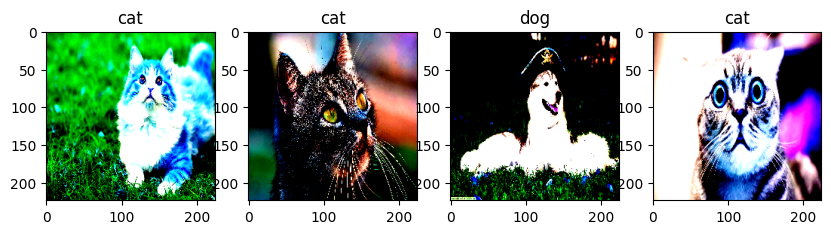

In [ ]:
plt.figure(figsize=(10, 5))

for i_batch, sample_batched in enumerate(train_loader):
    if i_batch == 1:
      break

    print(i_batch, sample_batched[0].shape)

    for j in range(4):
      plt.subplot(1, 4, j + 1)
      plt.title("cat" if sample_batched[1][j] == 0 else "dog")
      plt.imshow(sample_batched[0][j].permute(1, 2, 0).numpy()[:, :, ::-1])

In [ ]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()

        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2)
        self.conv_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.max_pool = nn.MaxPool2d(2)

        self.fully_connect1 = nn.Linear(5408, 10)
        self.fully_connect2 = nn.Linear(10, 1)

    def forward(self, x: torch.tensor) -> torch.tensor:
        output = self.relu(self.conv_1(x))
        output = self.max_pool(output)
        output = self.relu(self.conv_2(output))
        output = self.max_pool(output)
        output = torch.flatten(output, start_dim=1)
        output = self.relu(self.fully_connect1(output))
        output = torch.sigmoid(self.fully_connect2(output))
        return output

In [ ]:
# parameters = {'lr': [0.001, 0.01, 0.1],
#               'batch_size' : [16, 32, 48]}
parameters= {'lr': [0.001, 0.01],
            'batch_size' : [16]}

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model = CNN().to(device)

Epoch 1
Epoch: 1, train_accuracy: 0.7399999999999995, train_loss: 0.5218307375907898
Epoch: 1, valid_accuracy: 0.7611940298507461, valid_loss: 0.5013578534126282
Epoch 2
Epoch: 2, train_accuracy: 0.7900000000000003, train_loss: 0.4599732756614685
Epoch: 2, valid_accuracy: 0.8109452736318408, valid_loss: 0.4755188822746277
Epoch 3
Epoch: 3, train_accuracy: 0.8118750000000007, train_loss: 0.41774165630340576
Epoch: 3, valid_accuracy: 0.8109452736318407, valid_loss: 0.4247699975967407
Epoch 4
Epoch: 4, train_accuracy: 0.8368750000000006, train_loss: 0.3836408257484436
Epoch: 4, valid_accuracy: 0.8208955223880597, valid_loss: 0.38002389669418335
Epoch 5
Epoch: 5, train_accuracy: 0.8493750000000009, train_loss: 0.3465445637702942
Epoch: 5, valid_accuracy: 0.855721393034826, valid_loss: 0.3348007798194885
Epoch 6
Epoch: 6, train_accuracy: 0.8668750000000007, train_loss: 0.32142502069473267
Epoch: 6, valid_accuracy: 0.8009950248756217, valid_loss: 0.4549960196018219
Epoch 7
Epoch: 7, train_ac

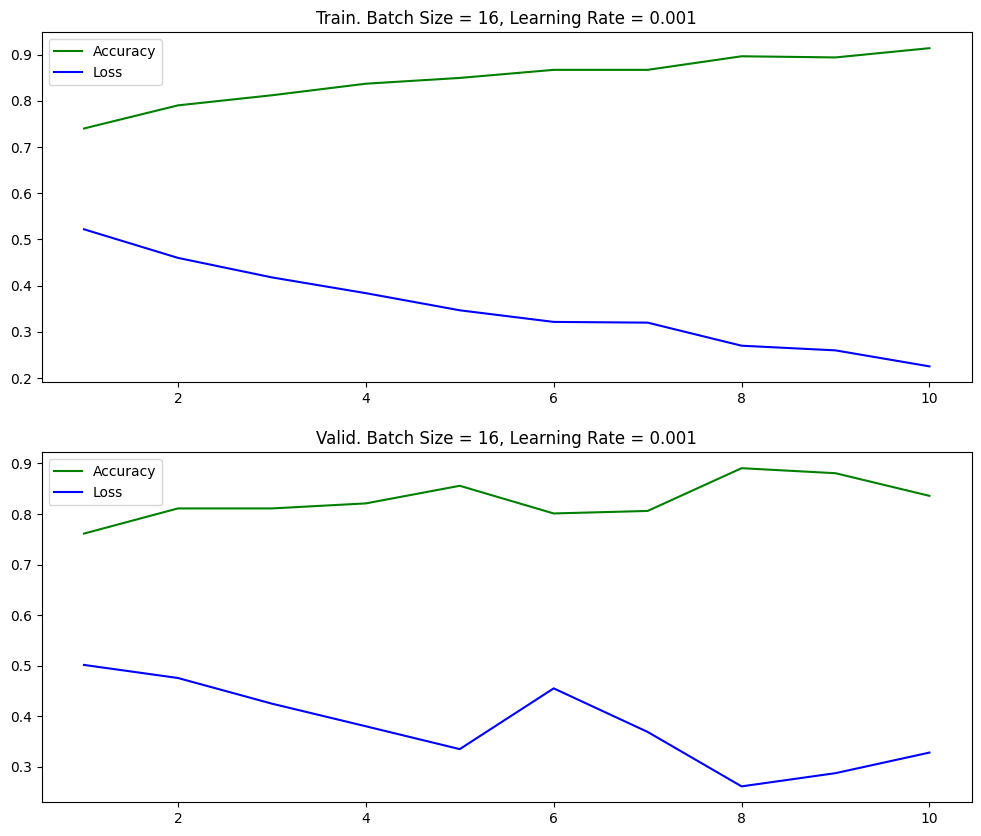

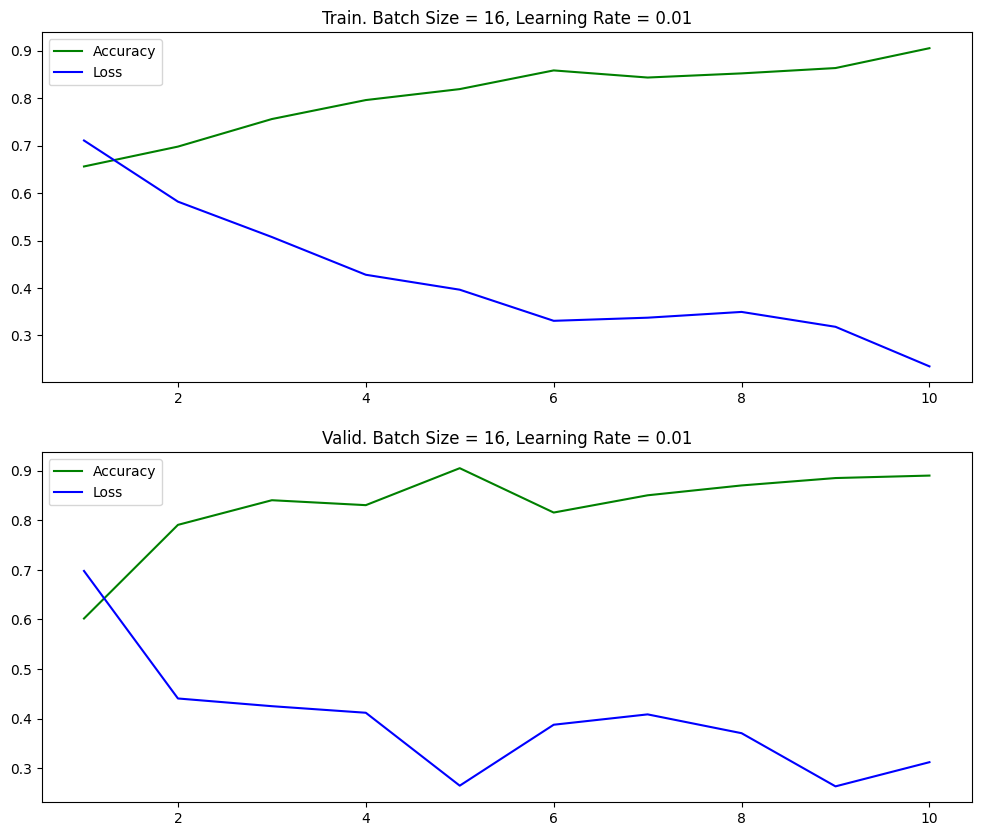

In [80]:
for lr in parameters['lr']:
    for bs in parameters['batch_size']:

        optimizer = optim.Adam(params=model.parameters(), lr=lr)
        criterion = nn.BCELoss(reduction='sum')

        train_loader = DataLoader(dataset=train_data, batch_size=bs, shuffle = True)
        test_loader = DataLoader(dataset=test_data, batch_size=bs, shuffle = False)
        valid_loader = DataLoader(dataset=valid_data, batch_size=bs, shuffle = False)

        epochs = 10

        train_accuracy_values = []
        train_loss_values = []

        val_accuracy_values = []
        val_loss_values = []

        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}")
            model.train()
            epoch_loss = 0
            epoch_accuracy = 0

            epoch_val_loss = 0
            epoch_val_accuracy = 0

            for data, label in train_loader:
                data = data.to(device)
                label = label.to(device)

                output = model(data)
                loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(len(label))])).sum()

                epoch_accuracy += acc / len(train_data)
                epoch_loss += loss / len(train_data)

            model.eval()
            for data, label in valid_loader:
                data = data.to(device)
                label = label.to(device)

                output = model(data)
                loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
                acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(len(label))])).sum()

                epoch_val_accuracy += acc / len(valid_data)
                epoch_val_loss += loss / len(valid_data)

            val_accuracy_values.append(epoch_val_accuracy)
            val_loss_values.append(epoch_val_loss)

            train_accuracy_values.append(epoch_accuracy)
            train_loss_values.append(epoch_loss)



            print('Epoch: {}, train_accuracy: {}, train_loss: {}'.format(epoch + 1, epoch_accuracy, epoch_loss))
            print('Epoch: {}, valid_accuracy: {}, valid_loss: {}'.format(epoch + 1, epoch_val_accuracy, epoch_val_loss))

        train_loss_values = [value.cpu().detach().numpy() for value in train_loss_values]
        val_loss_values = [value.cpu().detach().numpy() for value in val_loss_values]

        plt.figure(figsize=(12,10))

        plt.subplot(2, 1, 1)
        plt.title(f"Train. Batch Size = {bs}, Learning Rate = {lr}")
        plt.plot(range(1, epochs + 1), train_accuracy_values, color = 'green')
        plt.plot(range(1, epochs + 1), train_loss_values, color = 'blue')
        plt.legend(['Accuracy', 'Loss'])

        plt.subplot(2, 1, 2)
        plt.title(f"Valid. Batch Size = {bs}, Learning Rate = {lr}")
        plt.plot(range(1, epochs + 1), val_accuracy_values, color = 'green')
        plt.plot(range(1, epochs + 1), val_loss_values, color = 'blue')
        plt.legend(['Accuracy', 'Loss'])

        #model.eval()
        test_loss = 0
        test_accuracy = 0
        for data, label in test_loader:
            data = data.to(device)
            label = label.to(device)

            output = model(data)
            loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))

            acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(len(label))])).sum()

            test_accuracy+=acc / len(test_data)
            test_loss+=loss / len(test_data)

        torch.save(model.state_dict(), os.path.join("/content/drive/MyDrive/CN", f"batch_size{bs}_lr{lr}_weight.pt"))

        print('LR: {}, BS: {}, test_accuracy: {}, test_loss: {}'.format(lr, bs, test_accuracy, test_loss))

# Новый раздел

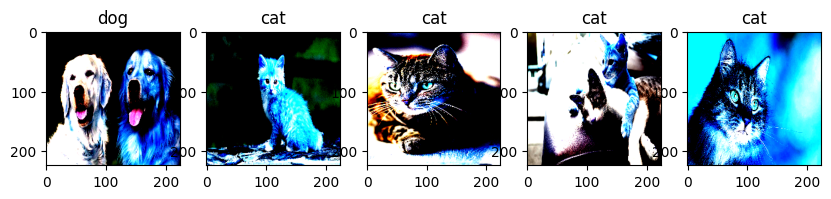

In [83]:
plt.figure(figsize=(10, 5))

for j in range(5):
  index = random.randint(0, 200)
  plt.subplot(1, 5, j + 1)
  plt.title("cat" if (1 if  model(test_data[index][0].unsqueeze(dim=0).to(device))[0] >= 0.5 else 0) == 0 else "dog")
  plt.imshow(test_data[index][0].permute(1, 2, 0).numpy()[:, :, ::-1])